# Project 3: ENSEMBLE TECHNIQUES

## CONTEXT

A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can 
analyse all relevant customer data and develop focused customer retention programs.

## DATA DESCRIPTION
Each row represents a customer, each column contains customer’s attributes described on the column 
Metadata. The data set includes information about:

• Customers who left within the last month – the column is called Churn

• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device 
protection, tech support, and streaming TV and movies

• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly 
charges, and total charges

• Demographic info about customers – gender, age range, and if they have partners and dependents

# PROJECT OBJECTIVE
Build a model that will help to identify the potential customers who have a higher probability to churn. 
This help the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategising 
customer retention.

## Solution

(Submitted by - Harsh Pundhir)

## 1. EDA

### 1.1 Importing and warehousing

In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)

In [2]:
df1 = pd.read_csv("TelcomCustomer-Churn.csv")
df1.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [3]:
print(df1.shape)
df1.info()

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

- Data contains 7043 rows and 21 columns

In [4]:
df2 = pd.read_csv("TelcomCustomer-Churn_1.csv")
df2.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  
0  No phone service             DSL             No  
1                No             DSL            Yes  
2                No             DSL            Yes  
3  No phone service             DSL            Yes  
4                No     Fiber optic             No

In [5]:
print(df2.shape)
df2.info()


(7043, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB


- This Data contains 7043 rows and 10 columns

In [6]:
df3 = pd.read_csv("TelcomCustomer-Churn_2.csv")
df3.head()

OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0          Yes               No          No          No              No   
1           No              Yes          No          No              No   
2          Yes               No          No          No              No   
3           No              Yes         Yes          No              No   
4           No               No          No          No              No   

         Contract PaperlessBilling              PaymentMethod  MonthlyCharges  \
0  Month-to-month              Yes           Electronic check           29.85   
1        One year               No               Mailed check           56.95   
2  Month-to-month              Yes               Mailed check           53.85   
3        One year               No  Bank transfer (automatic)           42.30   
4  Month-to-month              Yes           Electronic check           70.70   

  TotalCharges Churn  
0        29.85    No  
1       1889.5    No  
2       108.15   Yes  
3      1840.75    No  
4       151.65   Yes

In [7]:
print(df3.shape)
df3.info()

(7043, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OnlineBackup      7043 non-null   object 
 1   DeviceProtection  7043 non-null   object 
 2   TechSupport       7043 non-null   object 
 3   StreamingTV       7043 non-null   object 
 4   StreamingMovies   7043 non-null   object 
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   PaymentMethod     7043 non-null   object 
 8   MonthlyCharges    7043 non-null   float64
 9   TotalCharges      7043 non-null   object 
 10  Churn             7043 non-null   object 
dtypes: float64(1), object(10)
memory usage: 605.4+ KB


- Data contains 7043 rows and 11 columns
- It seems that df1 (TelcomCustomer-Churn.csv) is already a combination of df2 (TelcomCustomer-Churn_1.csv) and df3 (TelcomCustomer-Churn_2.csv)

- **Hence checking one by one all entries to ensure if actually df1 is combination of df2 and df3 or not**

In [8]:
# comparing each element from df1 to df2
test1 = 1
for i in range(0,7043):
    for j in range(0,10):
        if(df1.iat[i,j]!=df2.iat[i,j]):
            test1=0
            
test1

1

In [52]:
# comparing each element from df1 to df3 (j-10 since df3 seems like the second half of df1)
test2 = 1
for i in range(0,7043):
    for j in range(10,21):
        if(df1.iat[i,j]!=df3.iat[i,j-10]):
            test2=0
            
test2


1

- The results show that indeed df1 is a combined data from df2 and df3

**Alternatively df1 can be obtained by df1 = pd.concat([df2,df3],axis=1)**

In [10]:
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null Values!

In [11]:
for i in df1.columns:
    print(i," : ",df1[i].unique())


customerID  :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender  :  ['Female' 'Male']
SeniorCitizen  :  [0 1]
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
tenure  :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No phone service' 'No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes' 'No internet service']
OnlineBackup  :  ['Yes' 'No' 'No internet service']
DeviceProtection  :  ['No' 'Yes' 'No internet service']
TechSupport  :  ['No' 'Yes' 'No internet service']
StreamingTV  :  ['No' 'Yes' 'No internet service']
StreamingMovies  :  ['No' 'Yes' 'No internet service']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Elect

- Shows that there are no wrongly spelled data or a symbol that might represent a null value.

## 2. Missing value treatment and data type conversion

In [12]:
replace = {     
                "Partner":     {"No": 0, "Yes": 1 }, 
                "Dependents":     {"No": 0, "Yes": 1 }, 
                "PhoneService":     {"No": 0, "Yes": 1},
                "MultipleLines": {"No phone service": -1, "No":0 , "Yes": 1},
                "OnlineSecurity" : {"No internet service": -1, "No":0 , "Yes": 1},
                "OnlineBackup" : {"No internet service": -1, "No":0 , "Yes": 1},
                "DeviceProtection" : {"No internet service": -1, "No":0 , "Yes": 1},
                "TechSupport" : {"No internet service": -1, "No":0 , "Yes": 1},
                "StreamingTV" : {"No internet service": -1, "No":0 , "Yes": 1},
                "StreamingMovies" : {"No internet service": -1, "No":0 , "Yes": 1},
                "PaperlessBilling":     {"No": 0, "Yes": 1 },
                "Churn":     {"No": 0, "Yes": 1 },
                "gender":     {"Male": 0, "Female": 1 },
                "Contract" : {"Month-to-month": 0, "One year":1 , "Two year":2}
    
                }
df1 = df1.replace(replace)

#Use label encoder to convert categorical variables to label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


df1['PaymentMethod'] = le.fit_transform(df1['PaymentMethod'])
df1['InternetService'] = le.fit_transform(df1['InternetService'])





# to eliminate the rows that have white space in TotalCharges column 
df1.drop(index=(df1[df1['TotalCharges']==' ']).index, axis=0, inplace=True)
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])

df1.head()


customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       1              0        1           0       1   
1  5575-GNVDE       0              0        0           0      34   
2  3668-QPYBK       0              0        0           0       2   
3  7795-CFOCW       0              0        0           0      45   
4  9237-HQITU       1              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0             -1                0               0  ...   
1             1              0                0               1  ...   
2             1              0                0               1  ...   
3             0             -1                0               1  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 1            0            0                0         1   
2                 0            0            0                0         0   
3                 1            1            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1  

[5 rows x 21 columns]

- Payment method
    - Electronic : 2
    - Mailed : 3
    - Bank transfer : 0
    - Credit card : 1
- Internet service
    - DSL : 0
    - Fiber optics : 1
    - No : 2
    

In [13]:
# dropping the custmomer ID as it is a unique key

df1.drop(['customerID'],axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int32  


## 3. Statistical Analysis

### 3.1 Basic statistical analysis

In [14]:
df1.describe().transpose()

count         mean          std    min       25%       50%  \
gender            7032.0     0.495307     0.500014   0.00    0.0000     0.000   
SeniorCitizen     7032.0     0.162400     0.368844   0.00    0.0000     0.000   
Partner           7032.0     0.482509     0.499729   0.00    0.0000     0.000   
Dependents        7032.0     0.298493     0.457629   0.00    0.0000     0.000   
tenure            7032.0    32.421786    24.545260   1.00    9.0000    29.000   
PhoneService      7032.0     0.903299     0.295571   0.00    1.0000     1.000   
MultipleLines     7032.0     0.325228     0.642585  -1.00    0.0000     0.000   
InternetService   7032.0     0.872582     0.737271   0.00    0.0000     1.000   
OnlineSecurity    7032.0     0.070392     0.705562  -1.00    0.0000     0.000   
OnlineBackup      7032.0     0.128697     0.737917  -1.00    0.0000     0.000   
DeviceProtection  7032.0     0.127702     0.737415  -1.00    0.0000     0.000   
TechSupport       7032.0     0.073948     0.707715  -1.00    0.0000     0.000   
StreamingTV       7032.0     0.168231     0.756518  -1.00    0.0000     0.000   
StreamingMovies   7032.0     0.172213     0.758252  -1.00    0.0000     0.000   
Contract          7032.0     0.688567     0.832934   0.00    0.0000     0.000   
PaperlessBilling  7032.0     0.592719     0.491363   0.00    0.0000     1.000   
PaymentMethod     7032.0     1.573237     1.067504   0.00    1.0000     2.000   
MonthlyCharges    7032.0    64.798208    30.085974  18.25   35.5875    70.350   
TotalCharges      7032.0  2283.300441  2266.771362  18.80  401.4500  1397.475   
Churn             7032.0     0.265785     0.441782   0.00    0.0000     0.000   

                        75%      max  
gender               1.0000     1.00  
SeniorCitizen        0.0000     1.00  
Partner              1.0000     1.00  
Dependents           1.0000     1.00  
tenure              55.0000    72.00  
PhoneService         1.0000     1.00  
MultipleLines        1.0000     1.00  
InternetService      1.0000     2.00  
OnlineSecurity       1.0000     1.00  
OnlineBackup         1.0000     1.00  
DeviceProtection     1.0000     1.00  
TechSupport          1.0000     1.00  
StreamingTV          1.0000     1.00  
StreamingMovies      1.0000     1.00  
Contract             1.0000     2.00  
PaperlessBilling     1.0000     1.00  
PaymentMethod        2.0000     3.00  
MonthlyCharges      89.8625   118.75  
TotalCharges      3794.7375  8684.80  
Churn                1.0000     1.00

- senior citizens are low in numbers.
- total charges seem to have high skewness.
- non churners are significantly less than the churners.
- tenure is skewed by nature too.
- minimum and maximum monthly charges are 30.085 and 118.75 respectively.
- minimum and maximum total charges are 2266.77 and 8684.8 respectively (highly skewed).

### 3.2 Outliers under statistical analysis

In [15]:
lower_fence = df1.quantile(q=0.25) - (df1.quantile(q=0.75) - df1.quantile(q=0.25))*1.5
top_fence = df1.quantile(q=0.75) + (df1.quantile(q=0.75) - df1.quantile(q=0.25))*1.5

(df1[df1 > top_fence]).count()

gender                 0
SeniorCitizen       1142
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

- 1142 upper outliers in the senior citizen feature

In [16]:
(df1[df1 < lower_fence]).count()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService        680
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

- 680 lower outliers in the phone service feature

## 4. Visualisation

### 4.1 univariate analysis

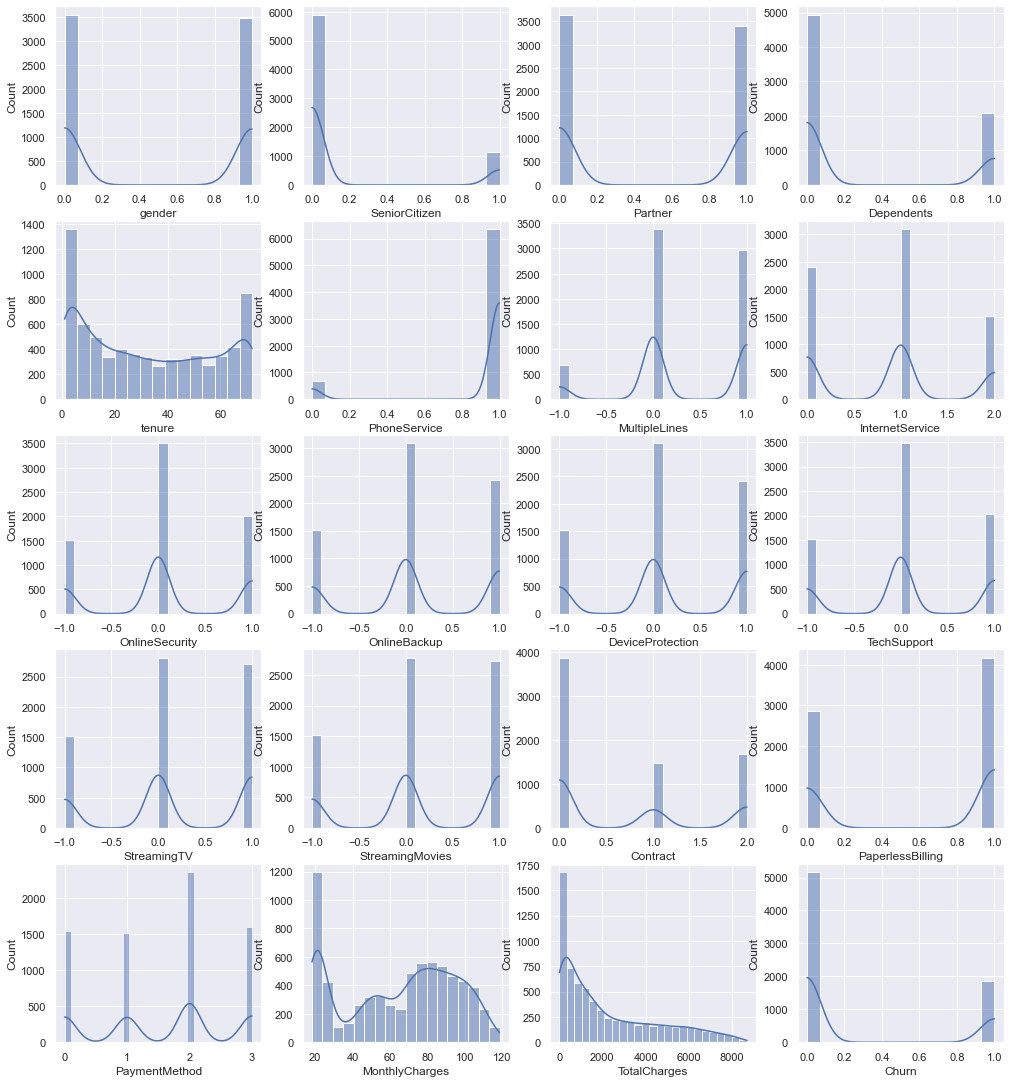

In [17]:
a = 6  # number of rows
b = 4  # number of columns
c=1

fig = plt.figure(figsize=(17,23))

for i in df1.columns:
    
    plt.subplot(a, b, c)
    plt.xlabel(i)
    sns.histplot(df1[i],kde=True);
    c=c+1

In [18]:
df1["Churn"].value_counts(normalize=True)

0    0.734215
1    0.265785
Name: Churn, dtype: float64

- Almost equal male and feamle proportions exist in the data.
- Highly low proportion of senior citizen can be observed.
- Majority of the people opted for phone service.
- The countplot of tenure peaks at the ends (min of ~32 and max of ~74).
- Monthly charges has 3 peaks as observed from the graph.
- TotalCharges chart is highly skewed.
- Electronic payment method is the most common payment method (as 2 has the highest count).
- Frequency of month to month contract is the highest.
- **Company is able to hold customers as major portion is 0 (no churn, ~ 73%). However, it also has a significant number of churners (~26.5%).**

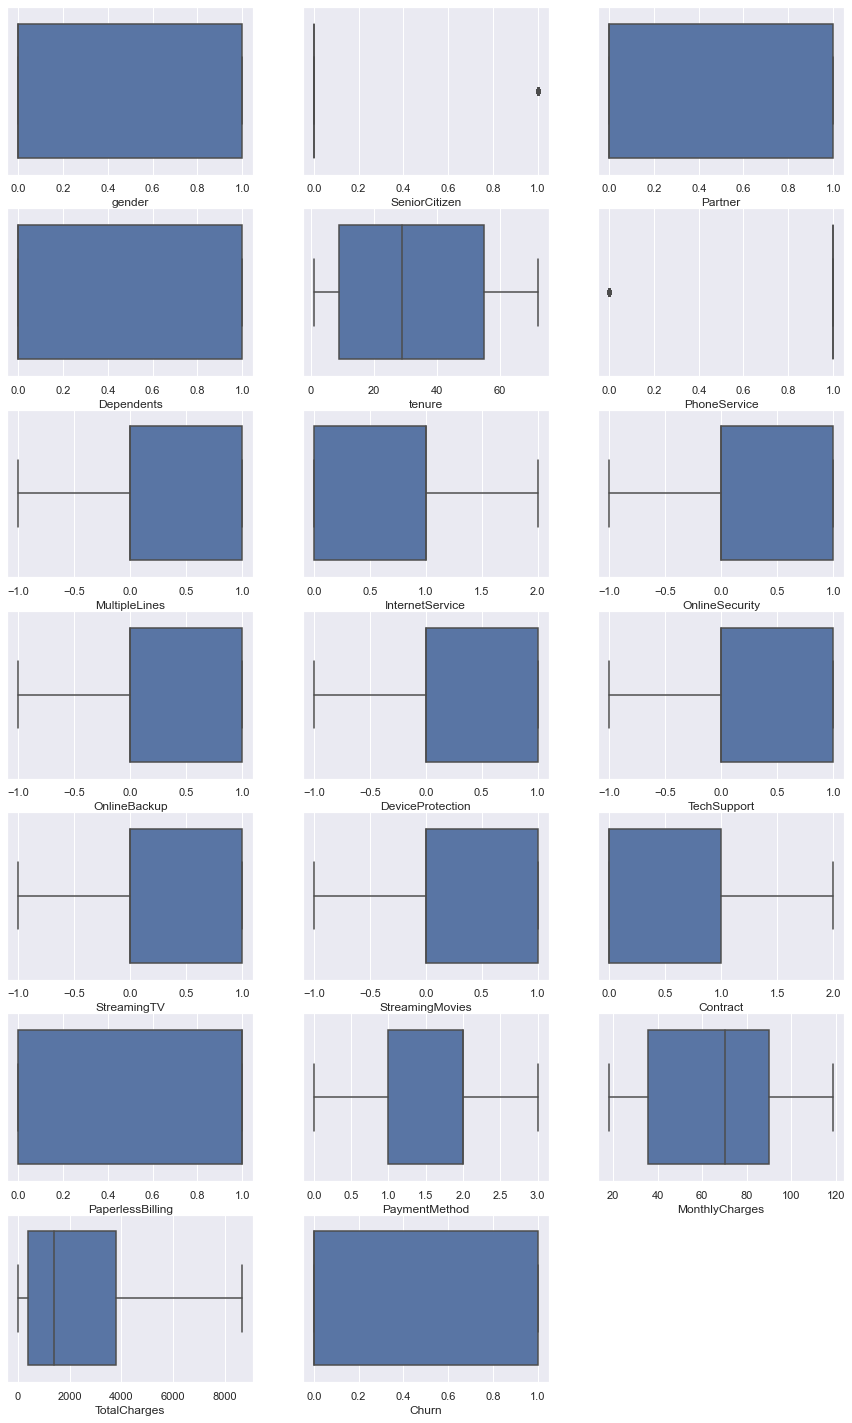

In [19]:
a = 8  # number of rows
b = 3  # number of columns
c=1

import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(15,29))

for i in df1.columns:  
    
    plt.subplot(a, b, c)
    plt.xlabel(i)
    sns.boxplot(df1[i]);
    c=c+1

- As observed under the statistical outliers analysis that PhoneService and seniorcitizens had the maximum outliers, the same can be observed here.
- The points are seen as a single point since the data entries are overlapping each other

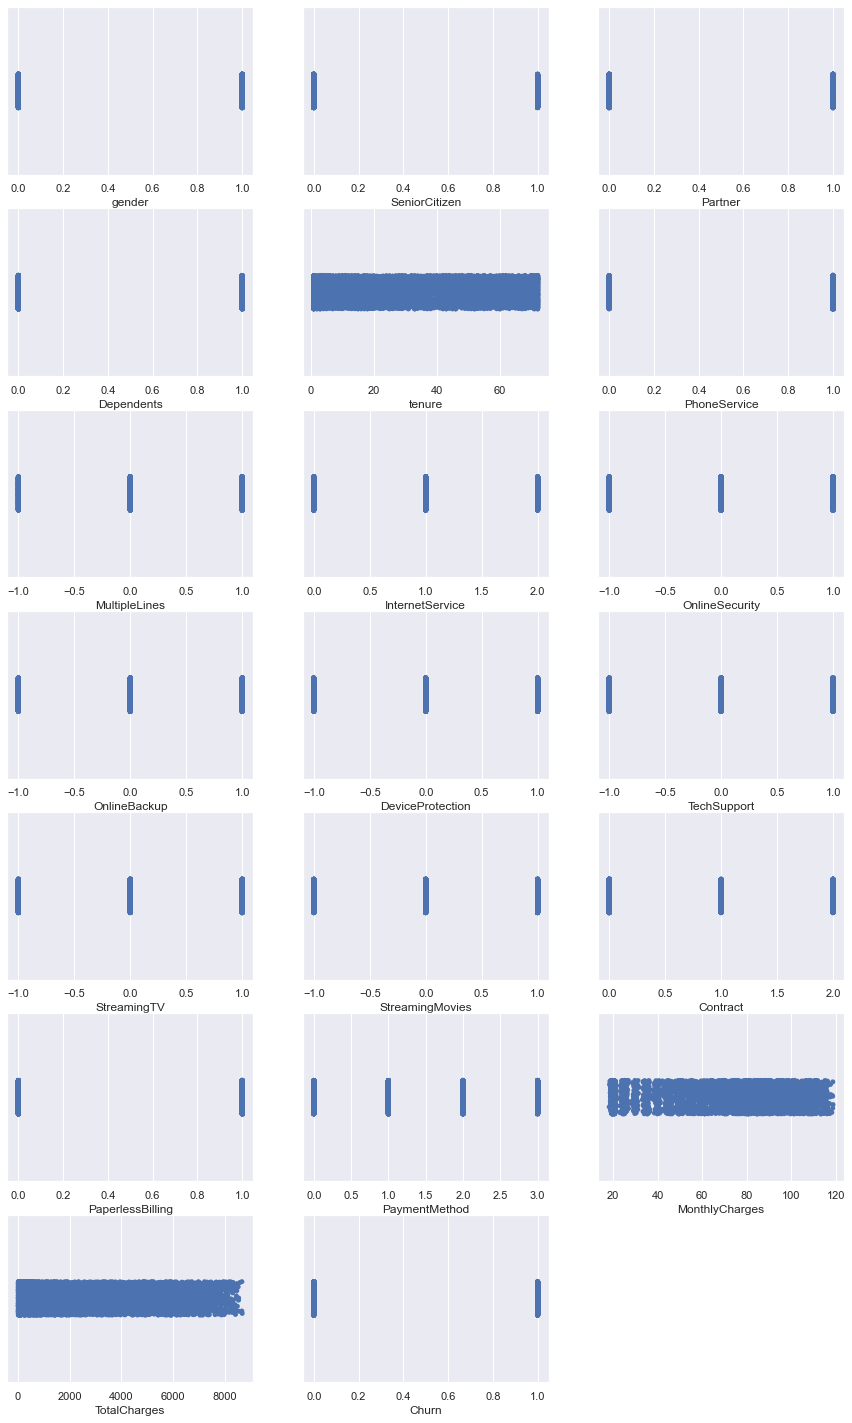

In [20]:
a = 8  # number of rows
b = 3  # number of columns
c=1

import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(15,29))

for i in df1.columns:  # dropping column class as it is categorical type.
    
    plt.subplot(a, b, c)
    plt.xlabel(i)
    sns.stripplot(df1[i]);
    c=c+1

- The results are in accordance with the box plots 

### 4.2 bivariate analysis

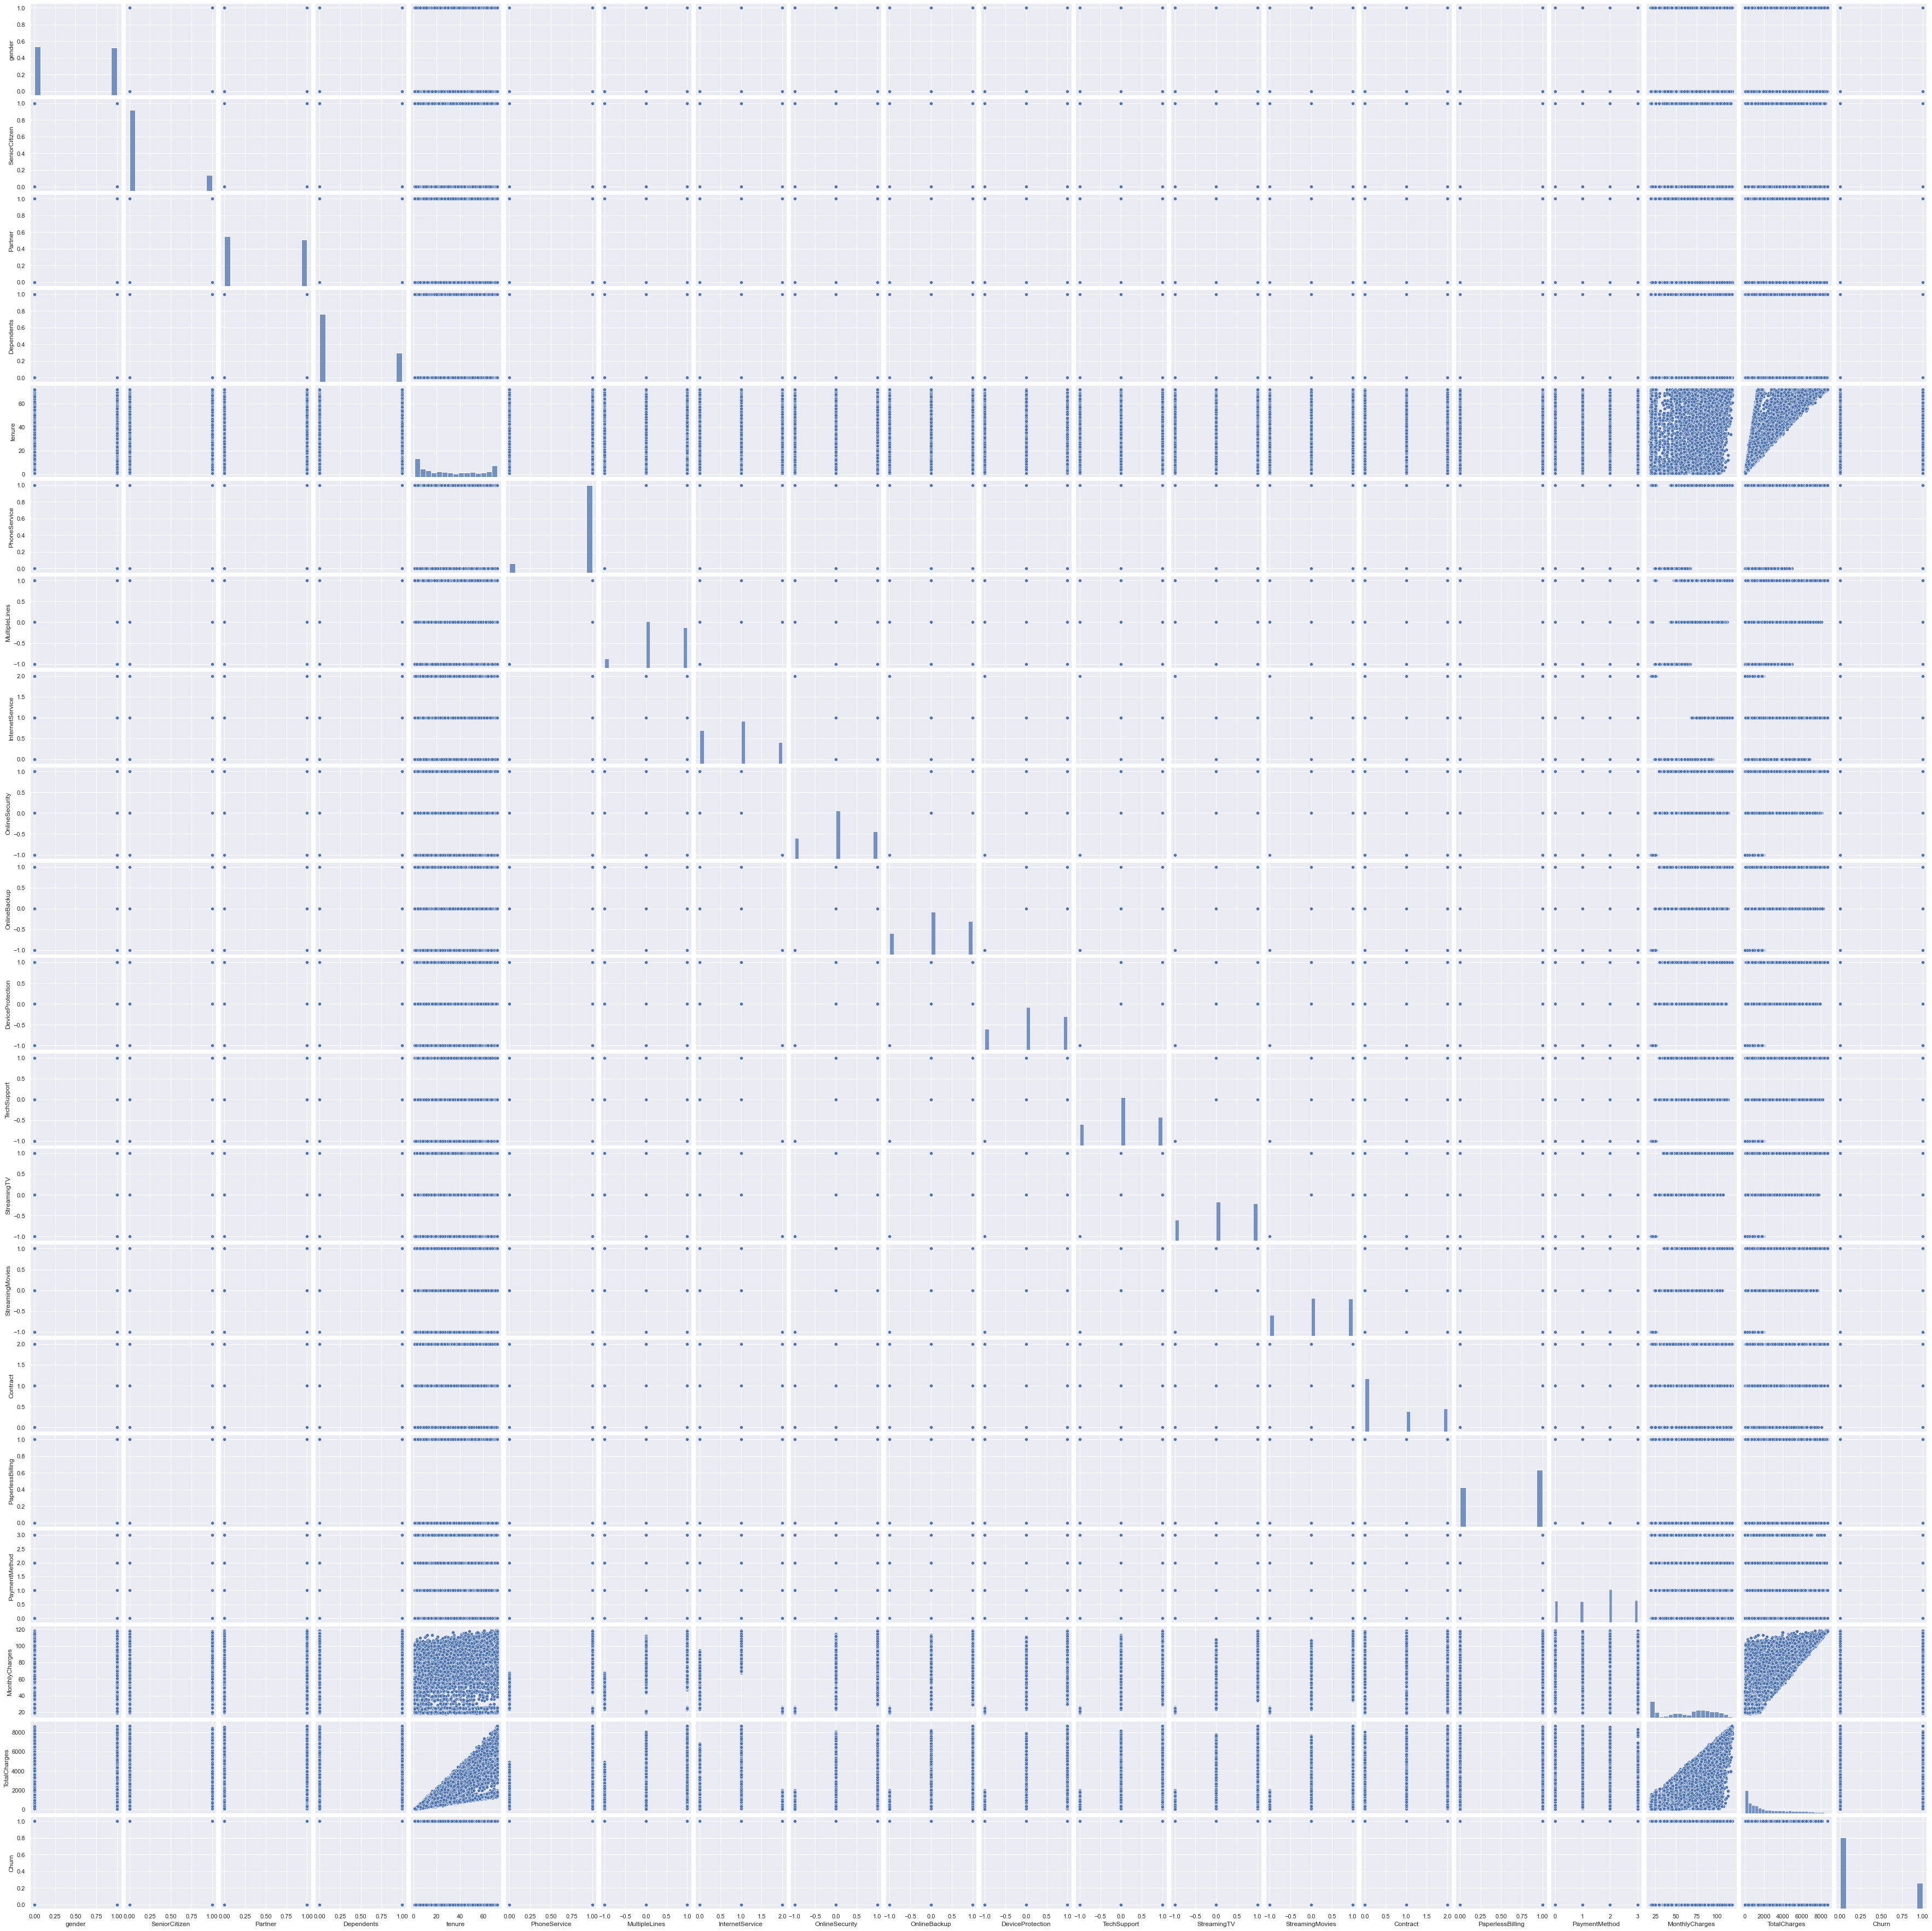

In [21]:
sns.pairplot(data=df1)

- Total charges and tenure seem to have a positive correaltion.
- Total charged and monthly charges also seem to have a positive correaltion.
- Total charges for people who had PhoneSevice(=1) was found to be higher.
- Monthly charges for people who had PhoneSevice(=1) was found to be higher.
- Customers using fiber optics (internet service = 1) had maximum monthly and total charges.
- Customers utilizing more number of multiple lines had higher monthly and total bill.
- Customers streaming TV and movies had higher monthly and total bill.
- People who opted for online backup and online security had higher bills.
- As for other sub-plots the data points are overlapping. Hence trying a different plot now.



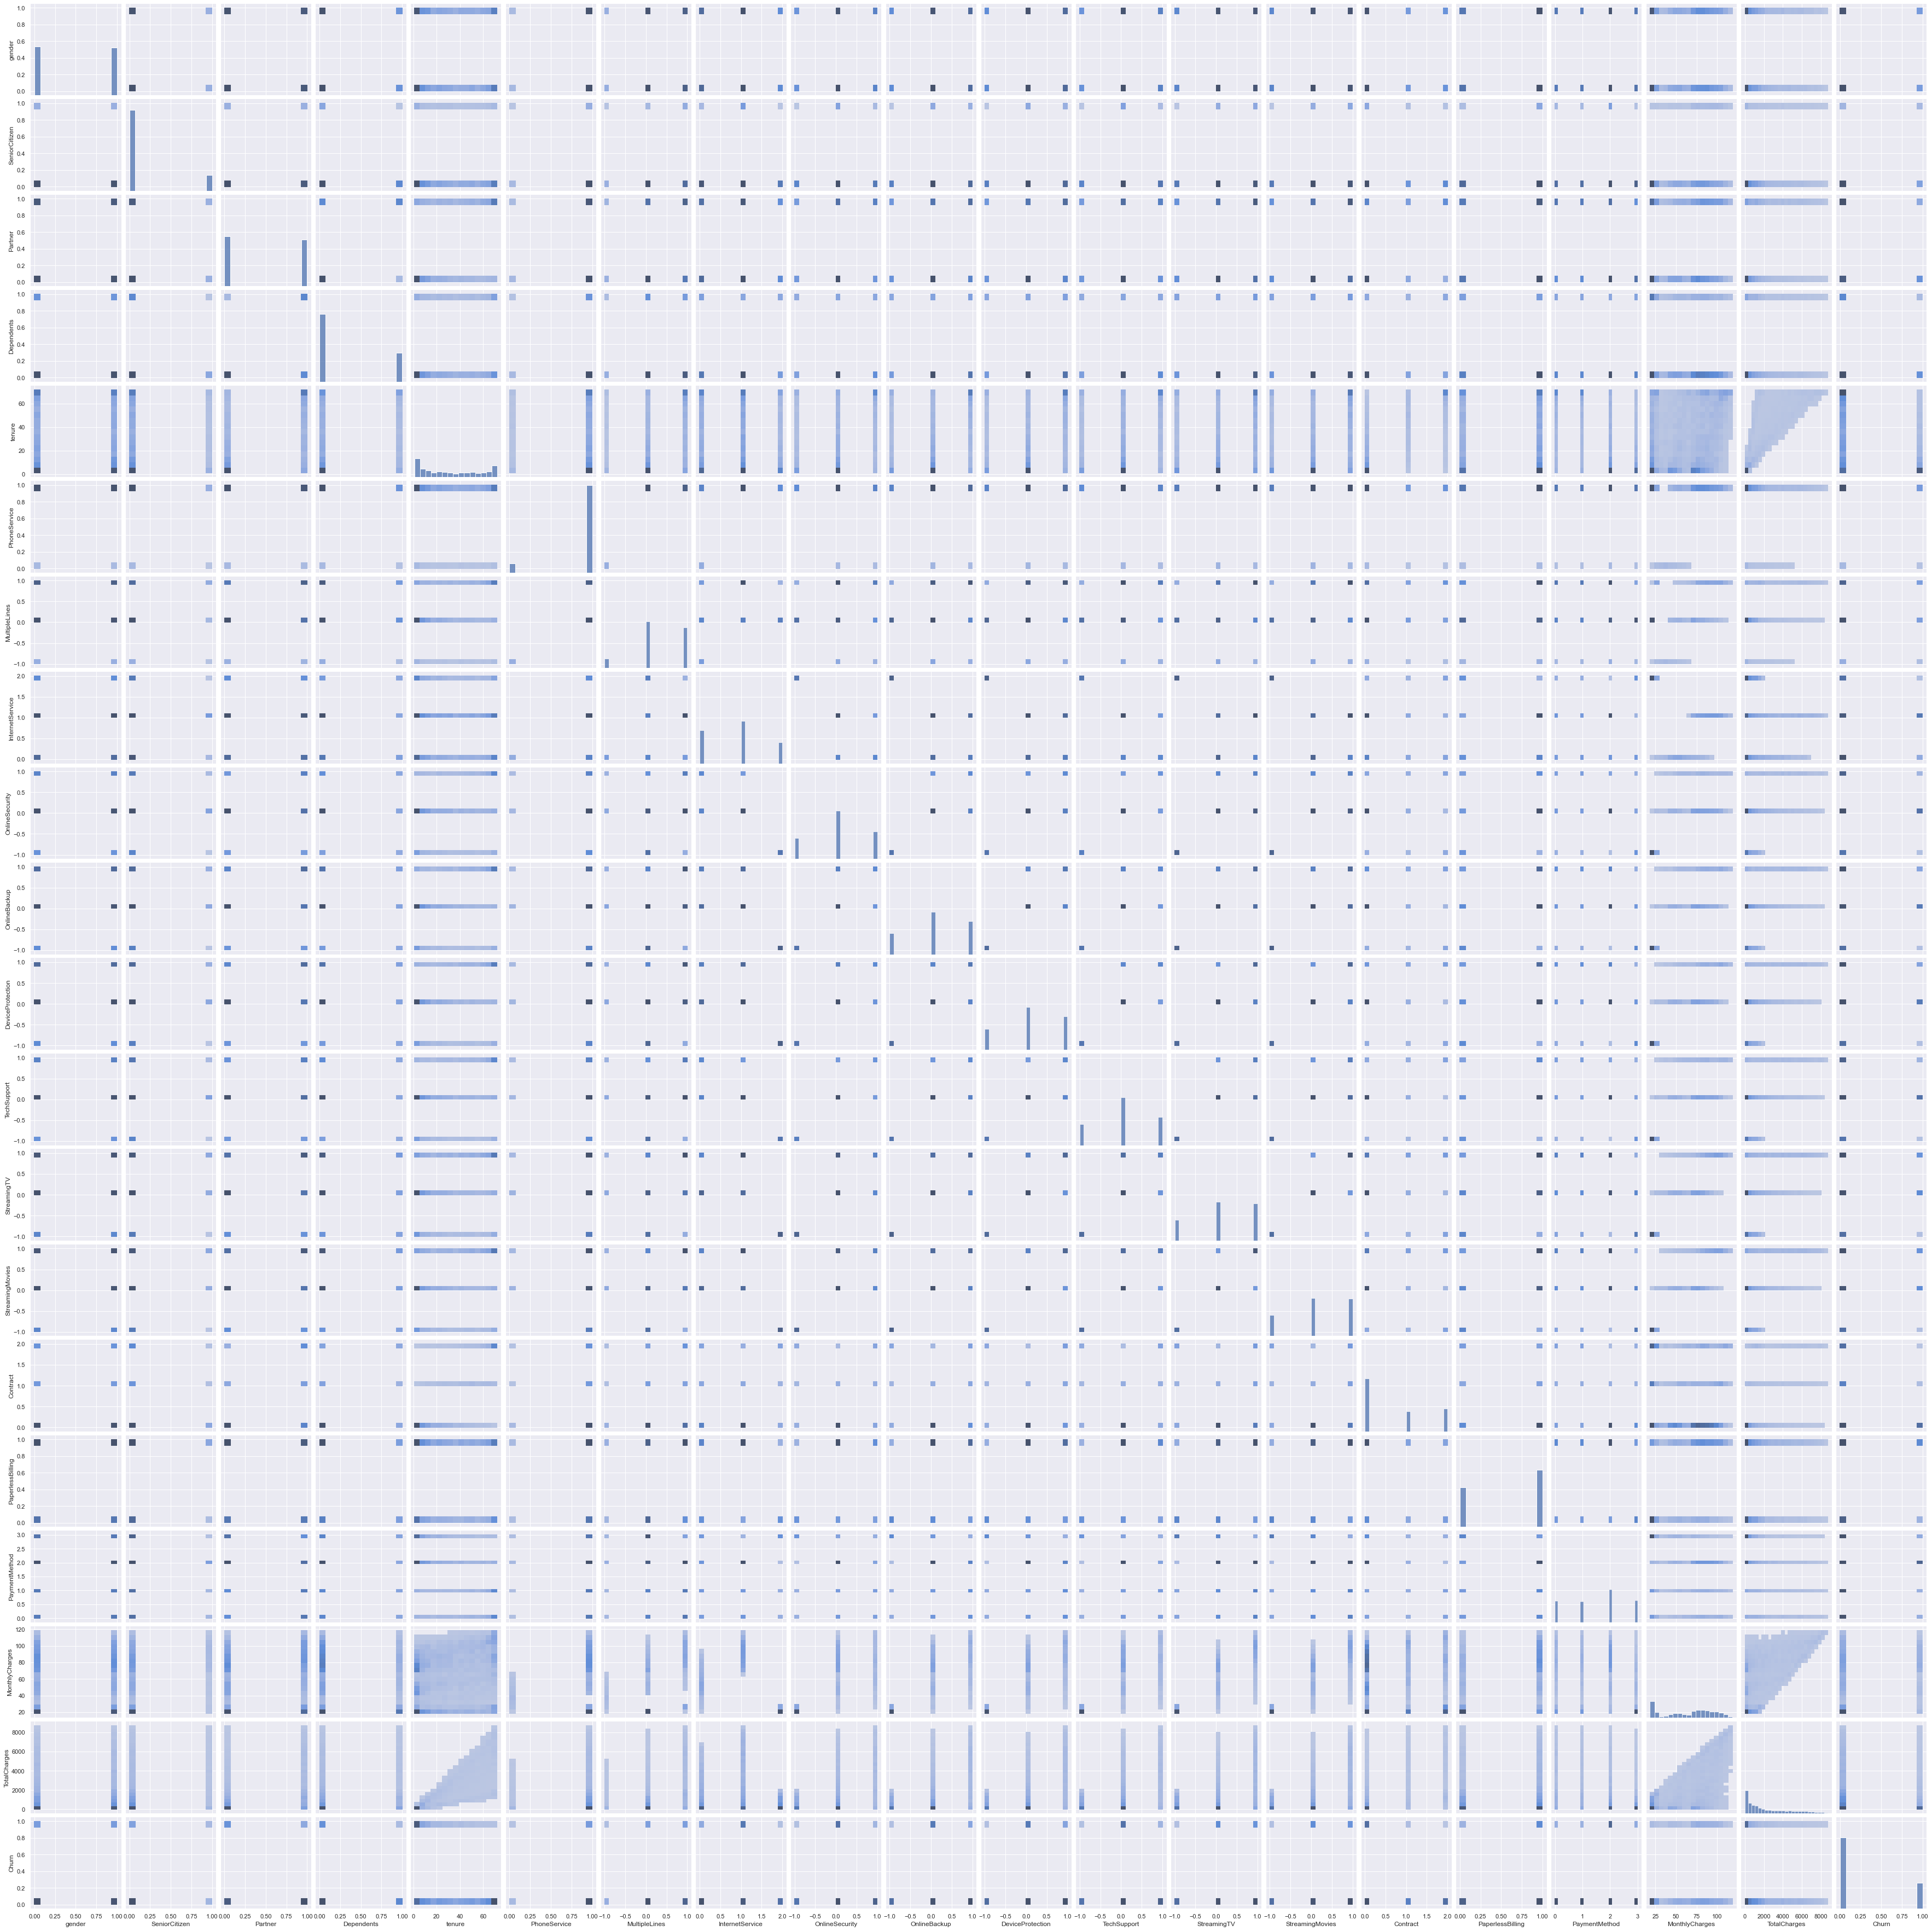

In [22]:
sns.pairplot(data=df1,kind='hist')

- It can be observed that non churners had comparatively little high total charges than the churners.
- Also non churners had comparatively little high monthly charges than the churners.

### confirming the correlation values

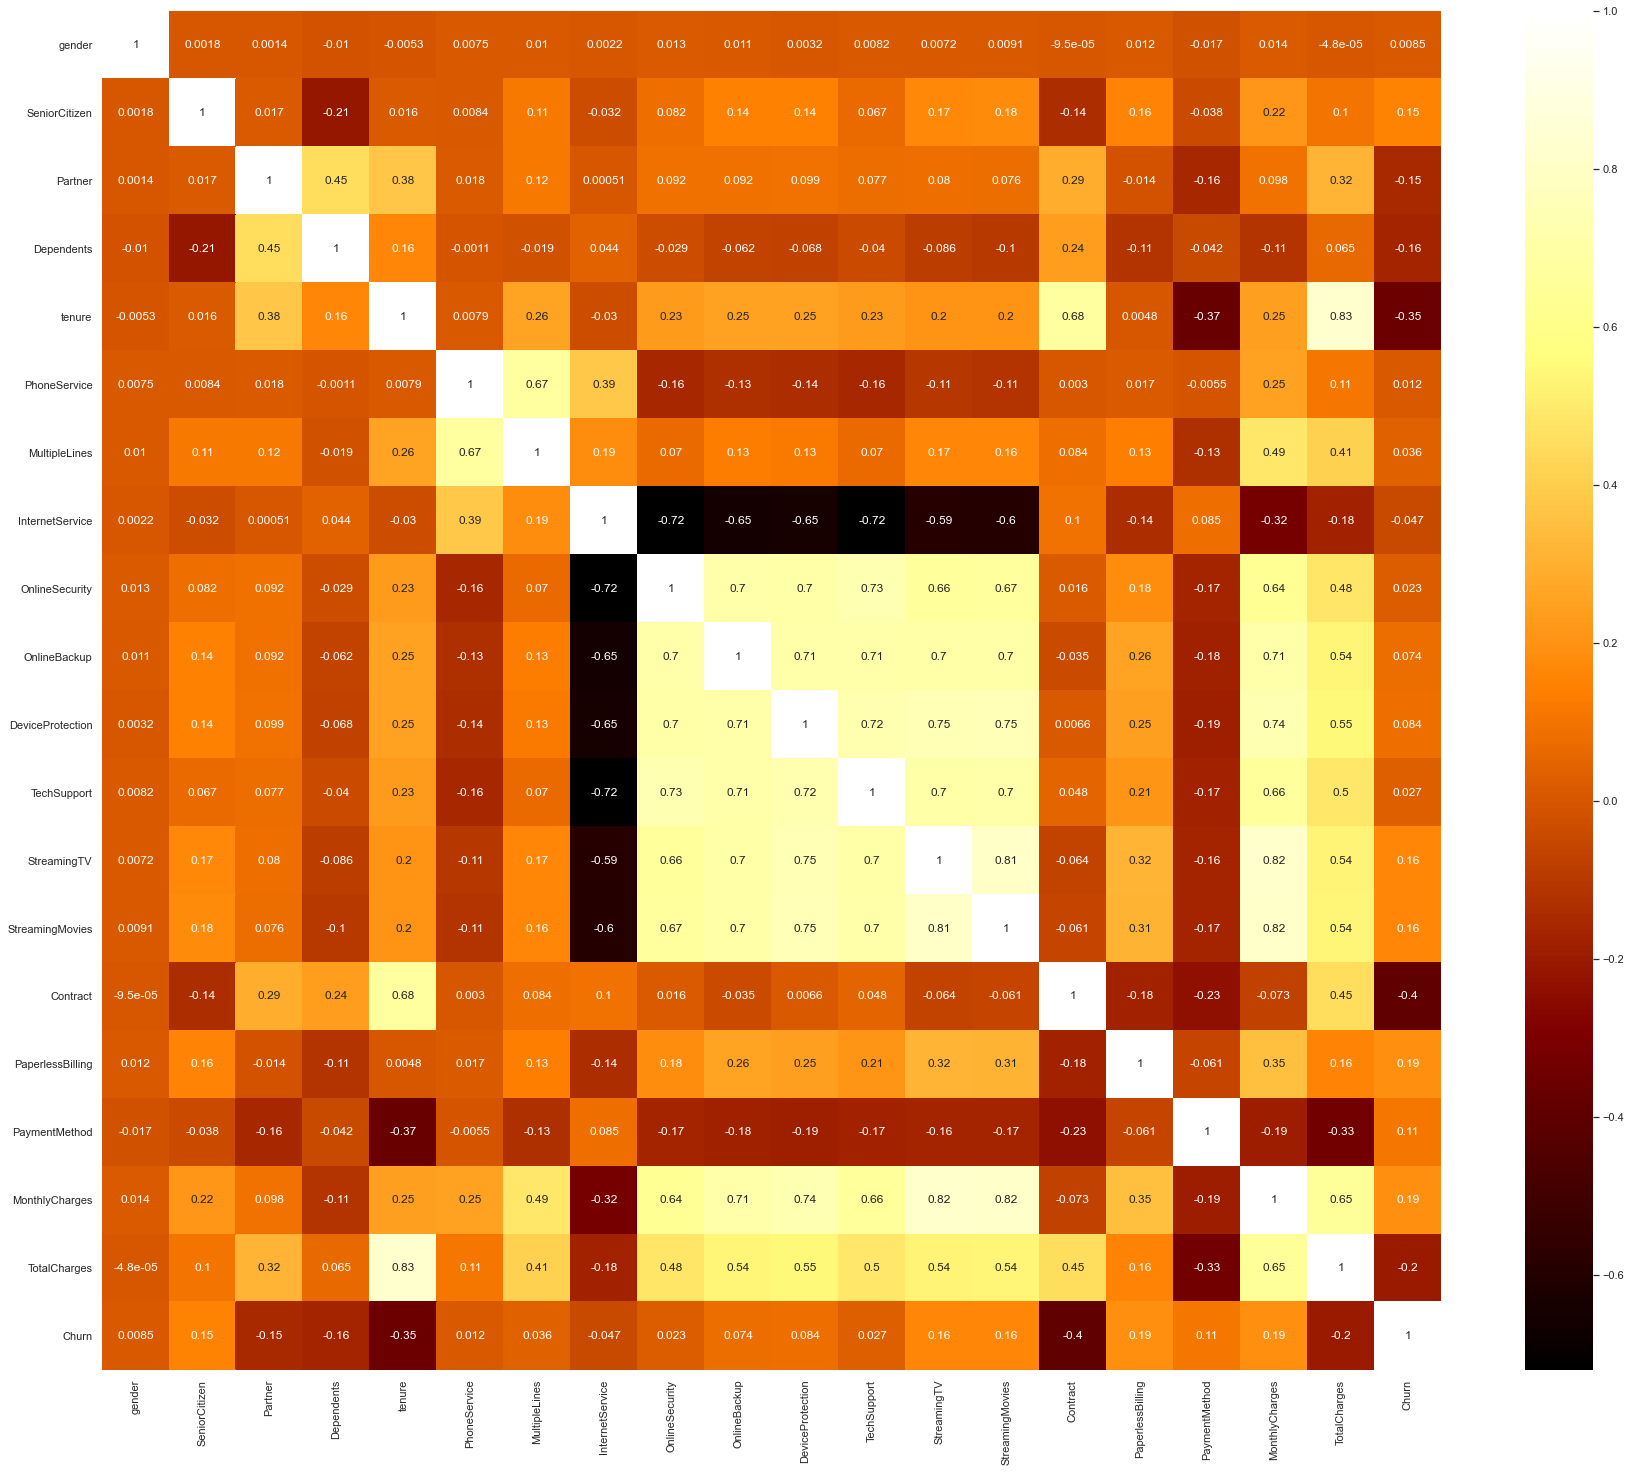

In [25]:
sns.set(rc = {'figure.figsize':(30,25)})
sns.heatmap(data = df1.corr(),annot=True,cmap ='afmhot');

- Streaming TV vs online security, online backup, device protection, tech support, streaming movies, monthly charges and total charges have good correlation.
- Streaming movies vs online security, online backup, device protection, tech support, streaming TV, monthly charges and total charges have good correlation.
- TechSupport vs online security, online backup, device protection, streaming TV, monthly charges and total charges have good correlation.
- deviceprotection vs online security, online backup, tech support, streaming TV, monthly charges and total charges have good correlation. 
- online backup vs online security, device protection, tech support, streaming TV, monthly charges and total charges have good correlation.
- online security vs online backup, device protection, tech support, streaming TV, monthly charges and total charges have good correlation.
- internet service, online security, online backup, device protection, tech support, streaming TV have high negative correlation pairwise
- **churn does not seem to have high positive or negative correlation with any of the fetaures.**


### 4.3 multivariate analysis

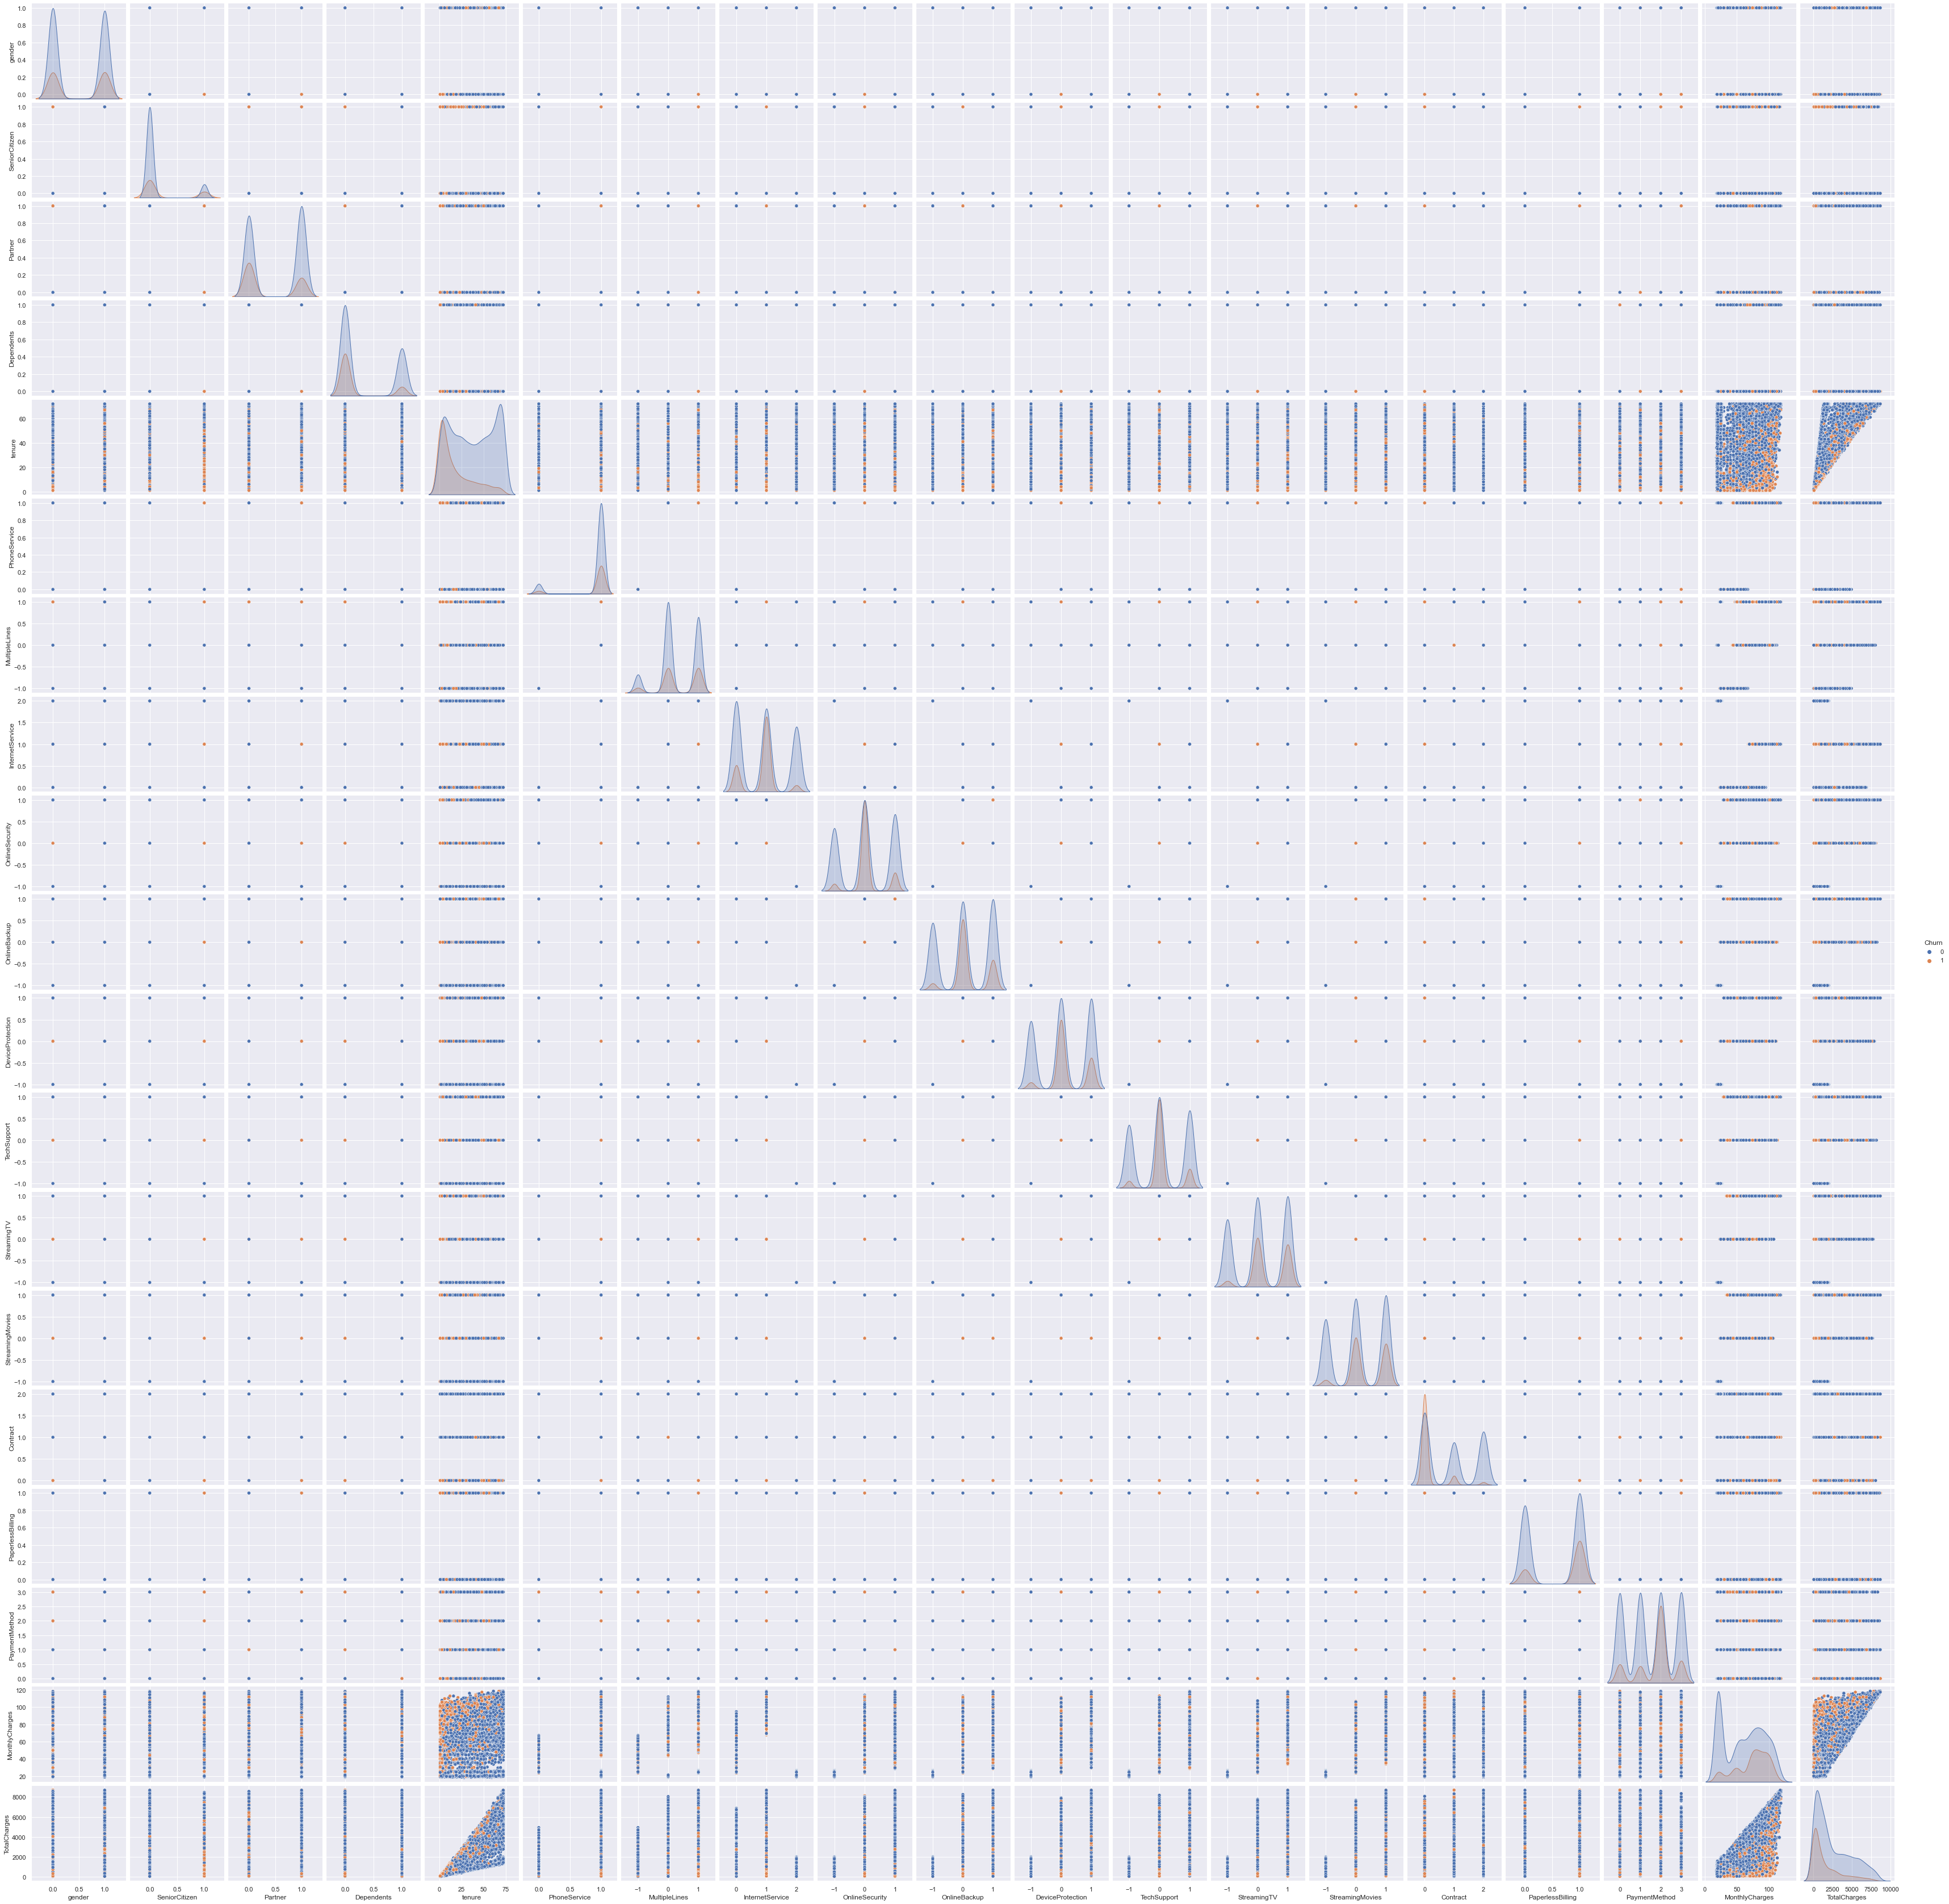

In [26]:
sns.pairplot(data = df1, hue = 'Churn');

- consumers with low tenure seem to have a higher churning rate.
- People with and without the honeService have almost the same churning rate.
- consumers without internet service (=2) have siginificantly less churners than fiber optics (=1) or DSL (=0).
- hence the churning cause might not be prominent in phone services but it has something to do with internet servicing.
- People with internetservice but without online security (=0) have high churners.
- People with Month to month contracts have high churners.

## 5. Data pre processing for model construction

In [17]:
# segregating the predictor (dependent) and target attributes (supposedly independent)
X = df1.drop("Churn" , axis=1)
Y = df1['Churn']
print(X.head())
Y.head

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0             -1                0               0             1   
1              0                0               1             0   
2              0                0               1             1   
3             -1                0               1             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 

<bound method NDFrame.head of 0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64>

### 5.1 performing train test split

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
print(df1.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7032, 20)
(4922, 19)
(2110, 19)
(4922,)
(2110,)


- The shapes are in accordance to our train and test slit parameters.

In [19]:
print(Y_train.value_counts(normalize=True))
print(Y_test.value_counts(normalize=True))

0    0.733035
1    0.266965
Name: Churn, dtype: float64
0    0.736967
1    0.263033
Name: Churn, dtype: float64


- this shows that the values are uniformly distributed in both train and the test set

## 6. Model construction

### 6.1 Bagging classifier model

In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

bgcl = BaggingClassifier(n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, Y_train)

y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , Y_test))


0.776303317535545


- With n_estimators as 50, the bagging classifier has a good accuracy

<AxesSubplot:>

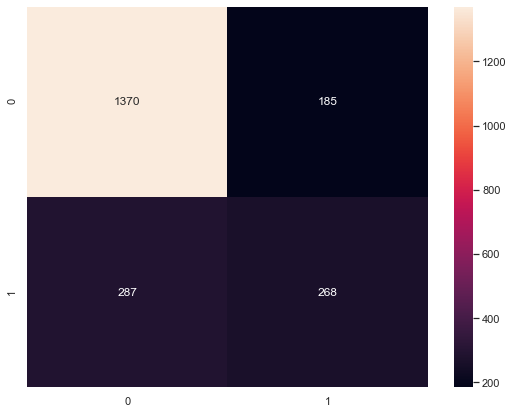

In [21]:
cm1=metrics.confusion_matrix(Y_test, y_predict)

plt.figure(figsize = (9,7))
sns.heatmap(data=cm1,annot=True,fmt='g')

- 185 + 287 = 472 data entries were misclassified
- 1370 + 268 = 1638 data entries were accurately classified

In [22]:
score_list = []
score_list2 = []

list1 = np.arange(5,70)


# perform accuracy metrics for values from 1....50 as n_estimator
for k in list1:
    bgcl = BaggingClassifier(n_estimators=k,random_state=1)

    bgcl = bgcl.fit(X_train, Y_train)

    y_predict = bgcl.predict(X_test)

    scores = bgcl.score(X_test , Y_test)
    scores2 = bgcl.score(X_train, Y_train)
   
    score_list.append(scores)
    score_list2.append(scores2)
    
print(max(score_list))
max(score_list2)


0.7781990521327015


0.9979683055668428

- The maximum accuracy of test data is ~77.8% an dfor train data it is ~ 99.8% (over fit for some n_estimator values)

In [23]:
print("Maximum accuracy for test data is %.3f and is obtained at n_estimator = %d" %(max(score_list),score_list.index(max(score_list))+5))

Maximum accuracy for test data is 0.778 and is obtained at n_estimator = 60


**Maximum accuracy 0.778 is obtained at an n_estimator value of = 60**

In [24]:
print("Maximum accuracy for train data is %.3f and is obtained at n_estimator = %d" %(max(score_list2),score_list2.index(max(score_list2))+5))

Maximum accuracy for train data is 0.998 and is obtained at n_estimator = 59


**Train data accuracy is ~99.8%, this shows that the model highly likely an overfit overfit**

In [25]:
score_list2[59]

0.9975619666802112

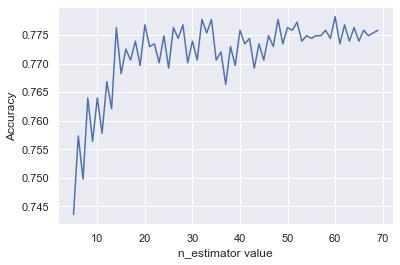

In [26]:
plt.plot(list1, score_list)
plt.xlabel('n_estimator value')
plt.ylabel('Accuracy')
plt.show()

In [27]:
score_list3 = []
score_list4 = []
values = []


list3 = np.arange(20,70)
list2 = np.arange(1,10)


# perform accuracy metrics for values from 1....50 as n_estimator
for k in list3:
    for i in list2:
        for j in list2:
            
                para_list = [k,i,j]
                bgcl = BaggingClassifier(n_estimators=k,max_samples=i,max_features=j,random_state=1)

                bgcl = bgcl.fit(X_train, Y_train)

                y_predict = bgcl.predict(X_test)

                scores = bgcl.score(X_test , Y_test)
                scores2 = bgcl.score(X_train, Y_train)

                score_list3.append(scores)
                score_list4.append(scores2)
                values.append(para_list)

    
print(max(score_list3))
print(max(score_list4))

0.7938388625592417
0.7962210483543275


- Wohoo! Max train and test accuracy after hyper tuning in loop is ~79.6% and ~79.4%
- Lets find  at which values

In [28]:
#a2 = score_list4.index((max(score_list4))                       
print("Max test efficiency at [n_estimator,max_samples,max_features] = ",values[score_list3.index((max(score_list3)))])
print("Max train efficiency at [n_estimator,max_samples,max_features] = ",values[score_list4.index((max(score_list4)))])

Max test efficiency at [n_estimator,max_samples,max_features] =  [41, 9, 9]
Max train efficiency at [n_estimator,max_samples,max_features] =  [33, 7, 7]


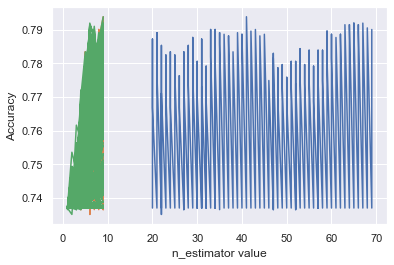

In [29]:
# test data

plt.plot(values, score_list3)
plt.xlabel('n_estimator value')
plt.ylabel('Accuracy')
plt.show()

- As oberved maximum at  n_estimator,max_samples,max_features =  41, 9, 9 respectively
- At this poin test data score is also similar, hence the model is not overfit or underfit

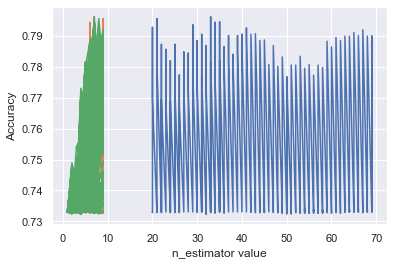

In [30]:
# train data

plt.plot(values, score_list4)
plt.xlabel('n_estimator value')
plt.ylabel('Accuracy')
plt.show()

- **choosing n_estimator,max_samples,max_features =  41, 9, 9 respectively as the best model under Bagging classifier**

In [53]:
bgcl = BaggingClassifier(n_estimators=41,max_samples=9,max_features=9,random_state=1)

bgcl = bgcl.fit(X_train, Y_train)

y_predict = bgcl.predict(X_test)

scores = bgcl.score(X_test , Y_test)
scores2 = bgcl.score(X_train, Y_train)

print(scores2)
print(metrics.classification_report(Y_test, y_predict, digits=3))

0.7889069483949614
              precision    recall  f1-score   support

           0      0.809     0.943     0.871      1555
           1      0.703     0.375     0.489       555

    accuracy                          0.794      2110
   macro avg      0.756     0.659     0.680      2110
weighted avg      0.781     0.794     0.770      2110



- Traind data also has a good and similar accuracy for the bagging classifier model (41,9,9)

- Other performance parameters like precision(~ 81), f1_score(~ 87)  and recall (~ 94) are in accordance with the accuracy hence suplementing the performance of the best picked bagging classifier model

<AxesSubplot:>

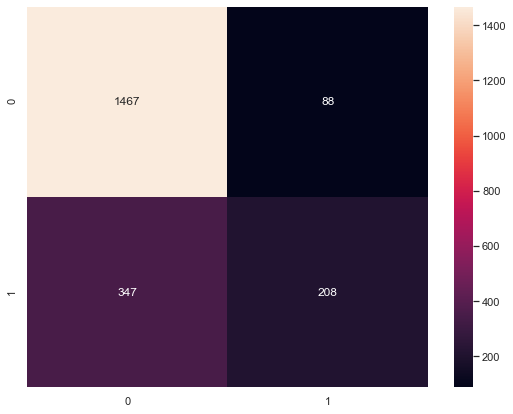

In [32]:
cm1=metrics.confusion_matrix(Y_test, y_predict)

plt.figure(figsize = (9,7))
sns.heatmap(data=cm1,annot=True,fmt='g')

- For the best bagging model

1. 1467 + 208 = 1675 data entries are were correctly classified
2. 88 + 347 = 435 data entries were misclassified

(these values are better than the 1st overfit model with n_estimator as 50 and everything else being the defaults.
185 + 287 = 472  misclassified, 
1370 + 268 = 1638 accurately classified)

### 6.2 Boosting - Adaptive Boost

In [33]:
from sklearn.ensemble import AdaBoostClassifier

score_ada = []

# list 1 was already defined as (5,70)
for k in list1:
    abcl = AdaBoostClassifier(n_estimators=k, random_state=1)

    abcl = abcl.fit(X_train, Y_train)
    score = abcl.score(X_test, Y_test)
    y_predict = abcl.predict(X_test)
    score_ada.append(score)

max(score_ada)

0.8037914691943128

- Max accuracy in the adaptive boost model is ~ 80.37%
- This accuracy is little better than the bagging clasiifier (~ 79.38%)

In [34]:
print("Max accuracy in the adaptive boost model is observed at n_estimators = ",score_ada.index(max(score_ada))+5)

Max accuracy in the adaptive boost model is observed at n_estimators =  60


In [35]:
abcl = AdaBoostClassifier(n_estimators=60, random_state=1)
abcl = abcl.fit(X_train, Y_train)
train_score = abcl.score(X_train, Y_train)

print("Train score for the chosen model (n_estimators =  60) is: ",train_score)


Train score for the chosen model (n_estimators =  60) is:  0.8102397399431126


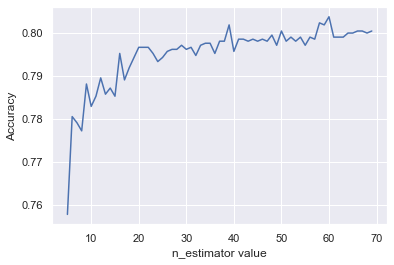

In [36]:
plt.plot(list1, score_ada)
plt.xlabel('n_estimator value')
plt.ylabel('Accuracy')
plt.show()

- As already showm , max accuracy is obtained at n_estimators = 60, the same is being reflected in the diagram 
- The diagram with low values of n_estimators performs poorly and get  better as n_estimators increases, with few interim peaks.

In [37]:
print(metrics.classification_report(Y_test, y_predict, digits=3))

              precision    recall  f1-score   support

           0      0.843     0.896     0.869      1555
           1      0.647     0.532     0.584       555

    accuracy                          0.800      2110
   macro avg      0.745     0.714     0.726      2110
weighted avg      0.791     0.800     0.794      2110



- The values of recall, precision and f1 score is also in line with the accuracy obtained

<AxesSubplot:>

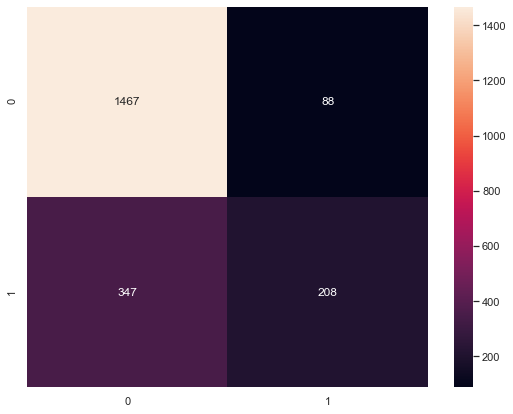

In [38]:
cm3=metrics.confusion_matrix(Y_test, y_predict)

plt.figure(figsize = (9,7))
sns.heatmap(data=cm1,annot=True,fmt='g')

- The values are same as the Bagging classifier (No improvement in the confusion matrix!)

### 6.3 Gradient Boosting

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

score_grad = []

# list 1 was already defined as (5,70)
for k in list1:
    gbcl = GradientBoostingClassifier(n_estimators=k, random_state=1)

    gbcl =gbcl.fit(X_train, Y_train)
    score = gbcl.score(X_test, Y_test)
    y_predict = gbcl.predict(X_test)
    score_grad.append(score)

max(score_grad)


0.8037914691943128

- Max accuracy is 80.37% (same as the adaptive boosting model)

In [40]:
print("Max accuracy in the gradient boost model is observed at n_estimators = ",score_grad.index(max(score_ada))+5)

Max accuracy in the gradient boost model is observed at n_estimators =  32


In [41]:
gbcl = GradientBoostingClassifier(n_estimators=32, random_state=1)
gbcl = abcl.fit(X_train, Y_train)
train_score = abcl.score(X_train, Y_train)

print("Train score for the chosen model (n_estimators =  60) is: ",train_score)

Train score for the chosen model (n_estimators =  60) is:  0.8102397399431126


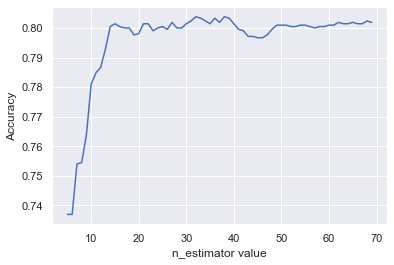

In [42]:
plt.plot(list1, score_grad)
plt.xlabel('n_estimator value')
plt.ylabel('Accuracy')
plt.show()

- The max accuracy (80.37%) is observed at n_estimator = 32
- The grapgh increses steeply with interim peaks and then tends to achieve a little linear nature

In [43]:
print(metrics.classification_report(Y_test, y_predict, digits=3))

              precision    recall  f1-score   support

           0      0.840     0.904     0.871      1555
           1      0.657     0.517     0.579       555

    accuracy                          0.802      2110
   macro avg      0.748     0.710     0.725      2110
weighted avg      0.792     0.802     0.794      2110



- The recall is a little better than the adaptive boosting model
- However, not much change in the parameters and since the values are close by, model is neither underfit nor overfit

<AxesSubplot:>

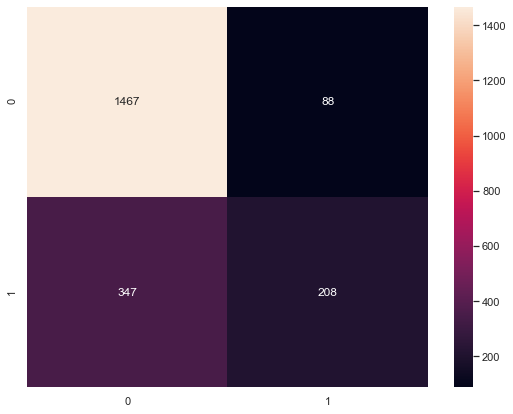

In [44]:
cm3=metrics.confusion_matrix(Y_test, y_predict)

plt.figure(figsize = (9,7))
sns.heatmap(data=cm1,annot=True,fmt='g')

- The confusion matrix is similar to that of adaptive boosting and the bagging classifier model.

###  6.4 Random classifier model

In [45]:
from sklearn.ensemble import RandomForestClassifier

n_list1 = np.arange(1,20)
n_list2 = np.arange(10,70)
rand_list_test = []
rand_list_train = []
indexes = []

for k in n_list2:
    for i in n_list1:
        temp = [k,i]
        rfcl = RandomForestClassifier(n_estimators = k, random_state=1,max_features=i)
        rfcl = rfcl.fit(X_train, Y_train)
        scores = bgcl.score(X_test , Y_test)
        scores2 = bgcl.score(X_train, Y_train)
        rand_list_test.append(scores)
        rand_list_train.append(scores2)
        indexes.append(temp)
        
print(max(rand_list_train))
max(rand_list_test)

0.7889069483949614


0.7938388625592417

In [46]:
print("%.3f is test accuracy of random forest model" %max(rand_list_test))
print("%.3f is train accuracy of random forest model" %max(rand_list_train))


0.794 is test accuracy of random forest model
0.789 is train accuracy of random forest model


- The random classifier model has good test (79.4%) and train (78.9%) accuracy
- The model is neither under nor overfit


In [47]:
print("Max test efficiency at [n_estimator, max_features] = ",indexes[rand_list_test.index((max(rand_list_test)))])
print("Max train efficiency at [n_estimator, max_features] = ",indexes[rand_list_train.index((max(rand_list_train)))])

Max test efficiency at [n_estimator, max_features] =  [10, 1]
Max train efficiency at [n_estimator, max_features] =  [10, 1]


In [54]:
rfcl = RandomForestClassifier(n_estimators = 10, random_state=1,max_features=1)
rfcl = rfcl.fit(X_train, Y_train)
scores2 = bgcl.score(X_train, Y_train)

scores2

0.7889069483949614

- Train efficiency for random classifier [n_estimator, max_features] =  [10, 1] is 78.89%
- Hence this model is neither underfit nor overfit

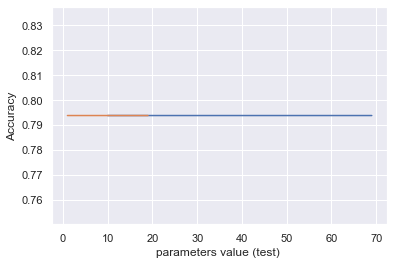

In [48]:
plt.plot(indexes, rand_list_test)
plt.xlabel('parameters value (test) ')
plt.ylabel('Accuracy')
plt.show()

- Hyper parameter tuning did not alter the accuracies at all !!!

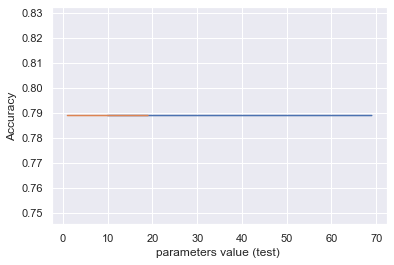

In [49]:
plt.plot(indexes, rand_list_train)
plt.xlabel('parameters value (test) ')
plt.ylabel('Accuracy')
plt.show()

- Same for the train data under the random forrest classifier

## 7. comparing models

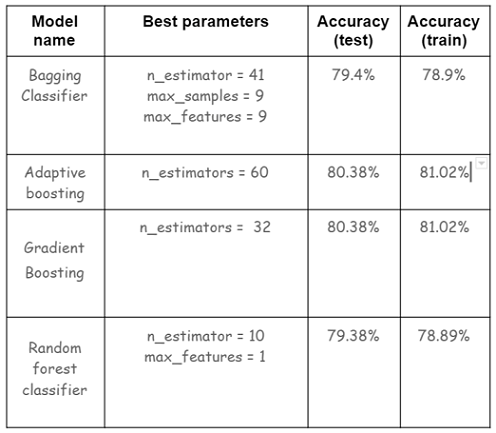

### 7.1 Selecting the best model

- The adaptive boosting and gradient boosting model came out as the best models among the performed model
- the accuracy of the adaptive and gradient boosting was found to be 80.38% (test) and 81.02% (train)
- the models are neither overfit nor uderfit, hence these can be chosen as the best model among ensemble techniques 

## 8.Conclusions


### 8.1 Statistical conclusion

- The results show that indeed df1 is a combined data from df2 and df3 hence df1 was taken as the data frame to proceed with.
- The rows that have white space in TotalCharges column were eliminated
- The total charges seem to have high skewness.
- The non churners are significantly less than the churners.
- 1142 upper outliers in the senior citizen feature
- 680 lower outliers in the phone service feature

### 8.2 Visualizational conclusion

- Majority of the people opted for phone service.
- Monthly charges has 3 peaks as observed from the graph.
- Electronic payment method is the most common payment method (as 2 has the highest count).
- Frequency of month to month contract is the highest.
- **Company is able to hold customers as major portion is 0 (no churn, ~ 73%). However, it also has a significant number of churners (~26.5%).**

- Total charges for people who had PhoneSevice(=1) was found to be higher.
- Monthly charges for people who had PhoneSevice(=1) was found to be higher.
- Customers using fiber optics (internet service = 1) had maximum monthly and total charges.
- Customers utilizing more number of multiple lines had higher monthly and total bill.
- Customers streaming TV and movies had higher monthly and total bill.
- People who opted for online backup and online security had higher bills.

- Streaming TV vs online security, online backup, device protection, tech support, streaming movies, monthly charges and total charges have good correlation.
- Streaming movies vs online security, online backup, device protection, tech support, streaming TV, monthly charges and total charges have good correlation.
- internet service, online security, online backup, device protection, tech support, streaming TV have high negative correlation pairwise
- **churn does not seem to have high positive or negative correlation with any of the fetaures.**


### 8.3 Model conclusion

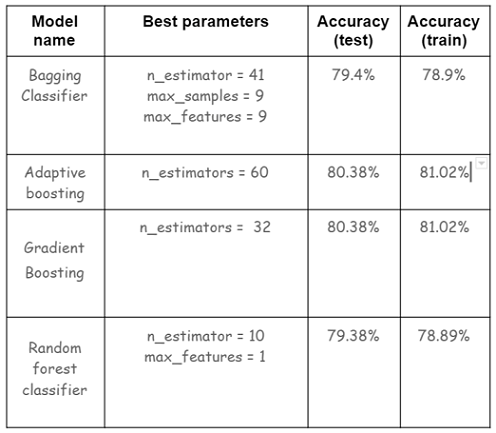

- The adaptive boosting and gradient boosting model came out as the best models among the performed model
- the accuracy of the adaptive and gradient boosting was found to be 80.38% (test) and 81.02% (train)
- the models are neither overfit nor uderfit, hence these can be chosen as the best model among ensemble techniques

## Suggestions:

### 1. Quantity

- More data can be loaded from various sources within the company so that more information can be captured
- If necessary source of the source can be increased - Marketing, campaigns, human traffic, surveys, etc. **(increasing churn numbers)**
- Based on the output demand, if needed extra features can be adding, thus increasing the quantity of the entire dataset

### 2. Quality
- The data must come from a trustworthy source. **(especially churn and features with high correlation to it)**
- Any approximation should be mentioned while handling the data to the model building team.
- The data initially can have parmeters like probability and confidence intervals.
- Lot of missing values / null values should be avoided at the collection source

### 3. Variety
- meta data from varoius sources should be consistent
- Semi-Structured and unstrcutured data must be carefully logged, as it is hard to deal with
- the column definitions must be clear with respect to the business context, so the analyst does not interpret it as something else
- Complex unstructured data can be avoided if not necessary

### 4. Velocity
- Real time trustworthy data collection.
- If need be, at the root level re-definition of few parameters must be possible.
- data quality assesment can be done to make the data better.
- Proper initial sampling can be performed every time a data entry takes place.

            ------------------------------------------- END --------------------------------------------------------